In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
import scipy.stats as stat

# Time series

### Plot original data

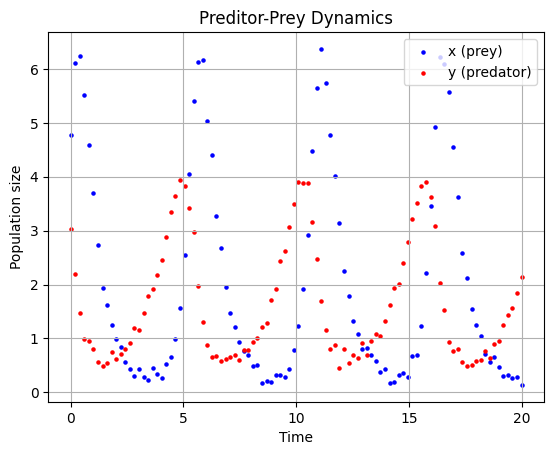

In [2]:
# import data from csv
df = pd.read_csv("predator-prey-data.csv", delimiter = ",")
t = df["t"]
x = df["x"]
y = df["y"]

# split data for two y axises
plt.title("Preditor-Prey Dynamics")
plt.ylabel("Population size")
plt.xlabel("Time")
plt.grid()
plt.scatter(t, x, color = 'b', s = 5, label = 'x (prey)')
plt.scatter(t, y, color = 'r', s = 5, label = 'y (predator)')
plt.legend()
t_data = []
for i in range(0, 21, 5):
    t_data.append(i)
plt.xticks(t_data)

# show plot
plt.show()

### Functions

In [3]:
# Lotka-Volterra equations

def lotka_volterra(init, t, alpha, beta, delta, gamma):
    x, y = init
    dxdt = alpha * x - beta * x * y 
    dydt = delta * x * y - gamma * y
    return dxdt, dydt

In [4]:
# Objective functions

def abs_residual(params, data):
    x = np.array(data['x'],dtype=float)
    y = np.array(data['y'],dtype=float)
    x_and_y = np.vstack((x,y)).T

    t_data = np.array(data['t'],dtype=float)
    
    y0 = [x[0], y[0]]       
    model = odeint(lotka_volterra, y0, t_data, args=(params[0], params[1], params[2], params[3]))

    return np.linalg.norm(model - x_and_y)**2

def loss_function_res(params, data):
    x = np.array(data['x'],dtype=float)
    y = np.array(data['y'],dtype=float)
    t_data = np.array(data['t'],dtype=float)

    y0 = [x[0], y[0]]
    model = odeint(lotka_volterra, y0, t_data, args=(params[0], params[1], params[2], params[3]))

    loss = 0
    for i in range(len(t_data)):
        x_data = x[i]
        x_model = model[i,0]

        y_data = y[i]
        y_model = model[i,1]

        res = (x_data - x_model)**2 + (y_data - y_model)**2
        loss += res
    return loss

## Fit data with loss function res 

In [5]:
def minimise_loss_function_res(df, params0=None):
    if params0 is None:
        params0 = np.array([-1, -0.5, -0.5, -2])
    output_minimise = minimize(loss_function_res, params0, args=(df))
    fitted_parameters = output_minimise.x
    loss = output_minimise.fun
    return output_minimise

def plot_lotka(df, fitted_parameters, extra_df=None):
    t = np.array(df['t'], dtype=float)
    x = np.array(df['x'], dtype=float)
    y = np.array(df['y'], dtype=float)
    alpha_fit, beta_fit, delta_fit, gamma_fit = fitted_parameters
    y0 = [x[0], y[0]]
    t = np.linspace(t[0], t[-1], num=len(t))
    output = odeint(lotka_volterra, y0, t, args=(alpha_fit, beta_fit, delta_fit, gamma_fit))

    plt.title("Preditor-Prey Dynamics")
    plt.ylabel("Population size")
    plt.xlabel("Time")
    plt.grid()

    plt.plot(t,output[:,0], color="r")
    plt.scatter(df["t"], df["x"], color = 'r', s = 5, label = 'x (prey)')

    if extra_df is not None:
        plt.scatter(extra_df["t"], extra_df["x"], color = 'black', s = 5, label = 'x (prey)')

    plt.show()

    plt.plot(t,output[:,1], color="b")
    plt.scatter(df["t"], df["y"], color = 'b', s = 5, label = 'x (predator)')
    if extra_df is not None:
        plt.scatter(extra_df["t"], extra_df["y"], color = 'black', s = 5, label = 'x (prey)')

    plt.show()

## Remove random points

In [6]:
np.random.seed(5)

def remove_random_rows(df, percentage):
    '''
    Percentage as decimal number.
    '''
    # Number of rows to remove
    remove_n = int(len(df) * percentage)

    drop_indices = np.random.choice(df.index, remove_n, replace=False)
    return df.drop(drop_indices)

# remove n% of rows in original dataframe
df_subset_25 = remove_random_rows(df, 0.25)
df_subset_50 = remove_random_rows(df, 0.50)
df_subset_75 = remove_random_rows(df, 0.75)

# concatenate subset 25% removed and 75% removed
df_subset_25_75 = pd.concat([df_subset_25, df_subset_75], ignore_index=True).sort_values(by='t')


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.9249604775130413
        x: [-2.007e+00 -1.161e+00 -4.384e-01 -8.569e-01]
      nit: 48
      jac: [ 6.299e-04 -3.087e-04 -4.796e-04  1.291e-03]
 hess_inv: [[ 4.619e-05 -6.193e-05  7.255e-05  3.302e-05]
            [-6.193e-05  1.037e-04 -1.195e-04 -6.492e-05]
            [ 7.255e-05 -1.195e-04  2.272e-04  7.252e-05]
            [ 3.302e-05 -6.492e-05  7.252e-05  5.192e-05]]
     nfev: 446
     njev: 87


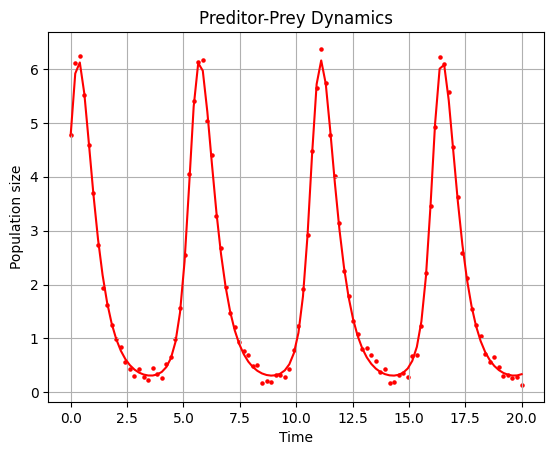

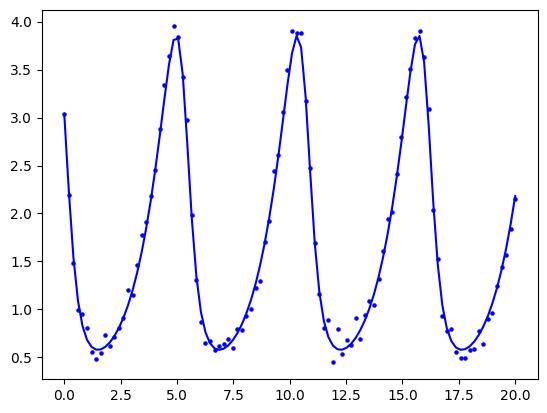

In [7]:
minimised_original = minimise_loss_function_res(df)
print(minimised_original)

plot_lotka(df, minimised_original.x)

In [8]:
minimised_25 = minimise_loss_function_res(df_subset_25)
print(minimised_25)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.5238701851513694
        x: [-2.009e+00 -1.166e+00 -4.375e-01 -8.569e-01]
      nit: 48
      jac: [-4.293e-03  3.327e-03  2.958e-02 -1.060e-02]
 hess_inv: [[ 3.127e-02  1.628e-02 -4.065e-03 -1.179e-02]
            [ 1.628e-02  9.537e-03 -1.951e-03 -5.797e-03]
            [-4.065e-03 -1.951e-03  7.764e-04  1.675e-03]
            [-1.179e-02 -5.797e-03  1.675e-03  4.601e-03]]
     nfev: 444
     njev: 88


C:\Users\Esthe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.779298547775847
        x: [-2.044e+00 -1.179e+00 -4.313e-01 -8.419e-01]
      nit: 46
      jac: [ 1.482e-04 -2.682e-05 -1.441e-04  3.545e-04]
 hess_inv: [[ 2.312e-03 -2.949e-03 -1.081e-03 -2.257e-03]
            [-2.949e-03  3.805e-03  1.482e-03  2.933e-03]
            [-1.081e-03  1.482e-03  9.500e-04  1.253e-03]
            [-2.257e-03  2.933e-03  1.253e-03  2.305e-03]]
     nfev: 511
     njev: 100


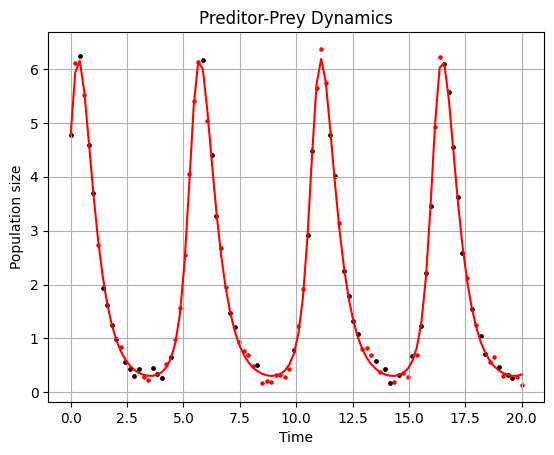

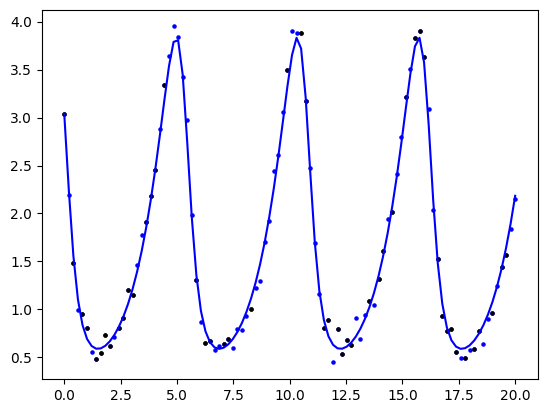

In [9]:
minimised_50 = minimise_loss_function_res(df_subset_50)
print(minimised_50)

plot_lotka(df, minimised_50.x, df_subset_50)

In [10]:
minimised_75 = minimise_loss_function_res(df_subset_75)
print(minimised_75)

C:\Users\Esthe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Esthe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 162.37911381463627
        x: [-9.259e-02 -1.890e-01 -3.772e+00 -8.099e+00]
      nit: 52
      jac: [-4.006e+02  5.078e+00  1.687e+01 -8.607e+00]
 hess_inv: [[ 5.088e-07  2.439e-05  2.441e-07  4.757e-06]
            [ 2.439e-05  1.772e-03 -2.122e-06  7.926e-04]
            [ 2.441e-07 -2.122e-06  5.373e-05  9.663e-05]
            [ 4.757e-06  7.926e-04  9.663e-05  8.036e-04]]
     nfev: 789
     njev: 156


In [11]:
print(f"0% removed rows loss: {minimised_original.fun}")
print(f"25% removed rows loss: {loss_function_res(minimised_25.x, df)}")
print(f"50% removed rows loss: {loss_function_res(minimised_50.x, df)}")
print(f"75% removed rows loss: {loss_function_res(minimised_75.x, df)}")

0% removed rows loss: 1.9249604775130413
25% removed rows loss: 1.938449068555317
50% removed rows loss: 1.9534346600196326
75% removed rows loss: 1174.0703274185441


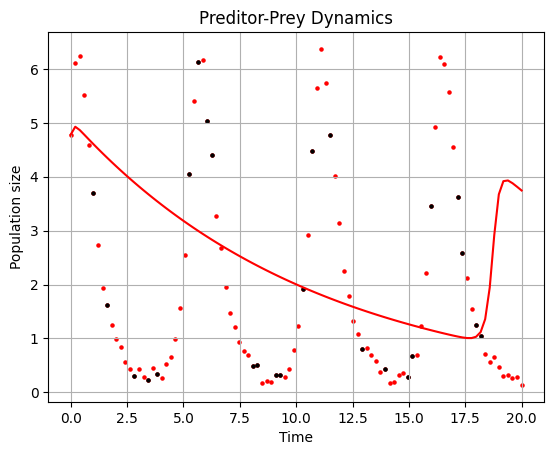

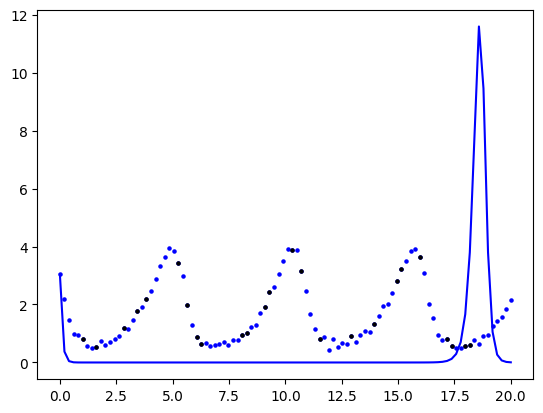

In [12]:
plot_lotka(df, minimised_75.x, df_subset_75)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2.01279483254616
        x: [-2.008e+00 -1.161e+00 -4.369e-01 -8.560e-01]
      nit: 48
      jac: [-5.549e-05 -5.162e-05 -1.763e-04 -6.905e-05]
 hess_inv: [[ 6.850e-03  2.089e-03 -2.662e-03 -4.439e-03]
            [ 2.089e-03  1.246e-03 -1.142e-03 -1.423e-03]
            [-2.662e-03 -1.142e-03  1.214e-03  1.762e-03]
            [-4.439e-03 -1.423e-03  1.762e-03  2.889e-03]]
     nfev: 517
     njev: 102


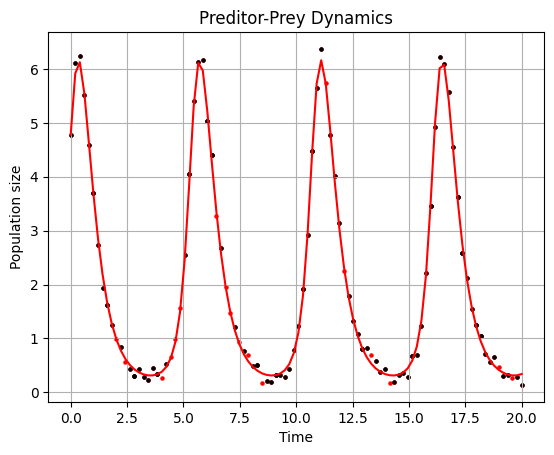

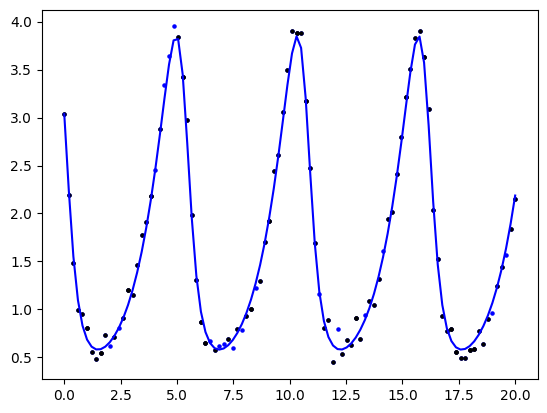

In [13]:
minimised_25_75 = minimise_loss_function_res(df_subset_25_75)
print(minimised_25_75)

plot_lotka(df, minimised_25_75.x, df_subset_25_75)


In [14]:
print(f"0% random removed points, loss: {minimised_original.fun}")
print(f"25% random removed points, loss: {loss_function_res(minimised_25.x, df)}")
print(f"50% random removed points, loss: {loss_function_res(minimised_50.x, df)}")
print(f"75% random removed points, loss: {loss_function_res(minimised_75.x, df)}")
print(f"Same amount of points but from different time series, loss: {loss_function_res(minimised_25_75.x, df)}")

0% random removed points, loss: 1.9249604775130413
25% random removed points, loss: 1.938449068555317
50% random removed points, loss: 1.9534346600196326
75% random removed points, loss: 1174.0703274185441
Same amount of points but from different time series, loss: 1.92981251472937


## Remove specific points

In [15]:
def remove_last(df, percentage):
    index_to_keep = int(len(df) * percentage)
    return df.iloc[:index_to_keep]

df_subset_50first = remove_last(df, 0.5)
df_subset_90first = remove_last(df, 0.9)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 190.91515534677492
        x: [ 1.066e+00  8.237e-01 -4.440e-01 -8.178e-01]
      nit: 88
      jac: [ 1.421e+04 -2.898e+04 -4.893e+04  1.596e+04]
 hess_inv: [[ 1.173e-01  6.789e-02 -3.521e-02 -8.920e-02]
            [ 6.789e-02  3.933e-02 -2.040e-02 -5.163e-02]
            [-3.521e-02 -2.040e-02  1.058e-02  2.678e-02]
            [-8.920e-02 -5.163e-02  2.678e-02  6.788e-02]]
     nfev: 942
     njev: 186


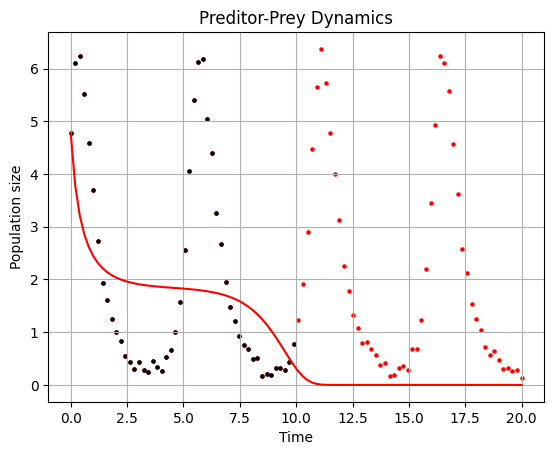

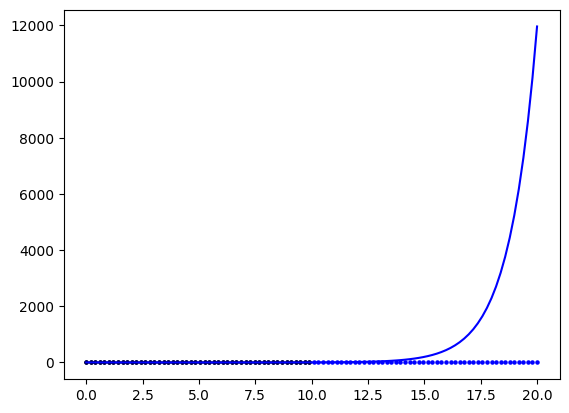

Removed last 50% of rows, loss: 508435060.7630925


In [16]:
minimised_50first = minimise_loss_function_res(df_subset_50first)
print(minimised_50first)

plot_lotka(df, minimised_50first.x, df_subset_50first)

print(f"Removed last 50% of rows, loss: {loss_function_res(minimised_50first.x, df)}")

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.7721920872402948
        x: [-2.019e+00 -1.165e+00 -4.356e-01 -8.513e-01]
      nit: 36
      jac: [-2.579e-04  2.823e-04  1.823e-04 -4.171e-04]
 hess_inv: [[ 2.966e-02  1.382e-02 -5.197e-03 -1.202e-02]
            [ 1.382e-02  7.668e-03 -2.140e-03 -5.176e-03]
            [-5.197e-03 -2.140e-03  1.232e-03  2.307e-03]
            [-1.202e-02 -5.176e-03  2.307e-03  5.063e-03]]
     nfev: 379
     njev: 74


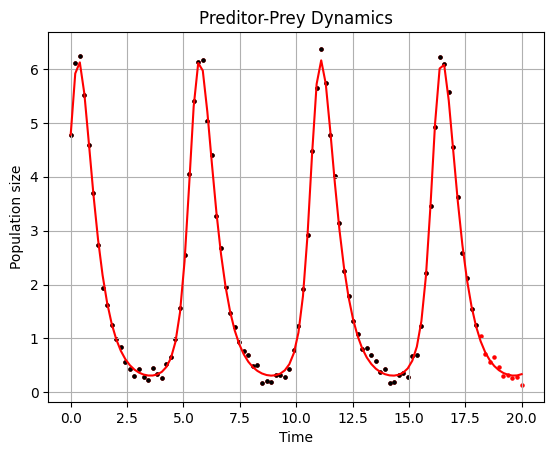

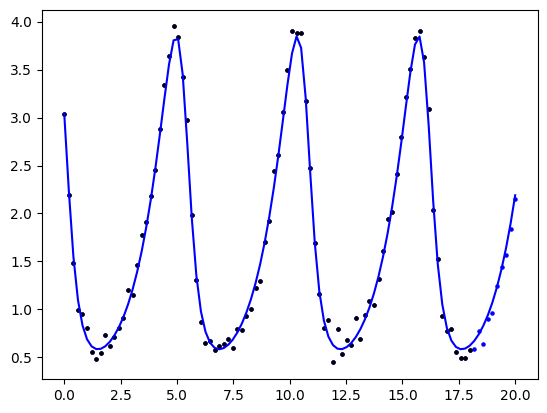

Removed last 10% of rows, loss: 1.930279060102313


In [17]:
minimised_90first = minimise_loss_function_res(df_subset_90first)
print(minimised_90first)

plot_lotka(df, minimised_90first.x, df_subset_90first)

print(f"Removed last 10% of rows, loss: {loss_function_res(minimised_90first.x, df)}")

In [18]:
print(f"0% random removed points, loss: {minimised_original.fun}")
print(f"25% random removed points, loss: {loss_function_res(minimised_25.x, df)}")
print(f"50% random removed points, loss: {loss_function_res(minimised_50.x, df)}")
print(f"75% random removed points, loss: {loss_function_res(minimised_75.x, df)}")
print(f"Same amount of points but from different time series, loss: {loss_function_res(minimised_25_75.x, df)}")
print(f"Removed last 10% of rows, loss: {loss_function_res(minimised_90first.x, df)}")
print(f"Removed last 50% of rows, loss: {loss_function_res(minimised_50first.x, df)}")

0% random removed points, loss: 1.9249604775130413
25% random removed points, loss: 1.938449068555317
50% random removed points, loss: 1.9534346600196326
75% random removed points, loss: 1174.0703274185441
Same amount of points but from different time series, loss: 1.92981251472937
Removed last 10% of rows, loss: 1.930279060102313
Removed last 50% of rows, loss: 508435060.7630925


maximum and minimum for predators

80

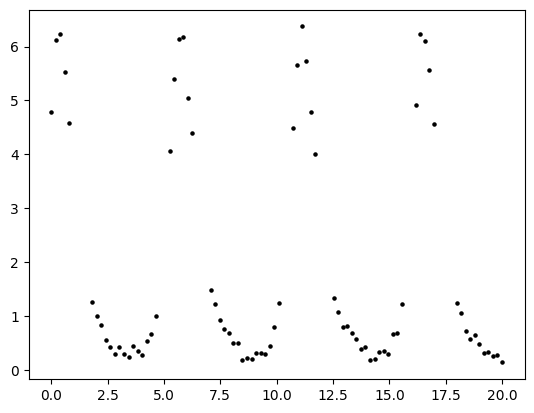

In [54]:
def filter_df(df, column, lower, upper):
        return df[~df[column].between(lower, upper)]

# df_subset_pred_peaks = filter_df(df, 'x', 0.5, 5.5) #40
df_subset_pred_peaks = filter_df(df, 'x', 0.68, 5) # 50
df_subset_pred_peaks = filter_df(df, 'x', 1.5, 4) # 80

plt.scatter(df_subset_pred_peaks["t"], df_subset_pred_peaks["x"], color = 'black', s = 5, label = 'x (prey)')
len(df_subset_pred_peaks)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.9729448687673558
        x: [-1.955e+00 -1.115e+00 -4.506e-01 -8.861e-01]
      nit: 41
      jac: [ 4.144e-05 -1.099e-05 -3.579e-05  7.469e-05]
 hess_inv: [[ 3.043e-04  7.661e-04  2.713e-04  1.501e-04]
            [ 7.661e-04  1.992e-03  5.555e-04  2.921e-04]
            [ 2.713e-04  5.555e-04  9.068e-04  5.629e-04]
            [ 1.501e-04  2.921e-04  5.629e-04  3.644e-04]]
     nfev: 316
     njev: 61


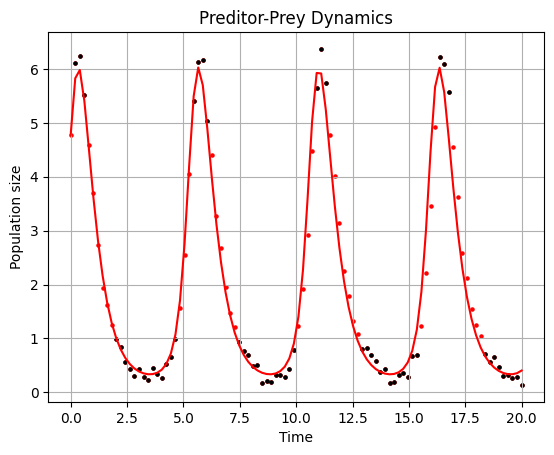

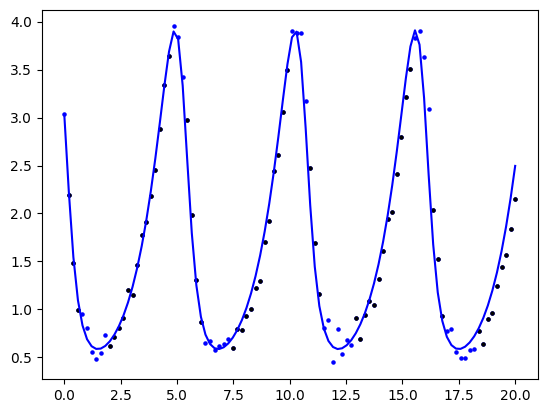

In [55]:
minimised_pred_peaks = minimise_loss_function_res(df_subset_pred_peaks)
print(minimised_pred_peaks)

plot_lotka(df, minimised_pred_peaks.x, df_subset_pred_peaks)

# Multiple runs for remove rows

In [151]:
def multi_run_remove_rows(df, n_runs):
    dict_percentage_loss = {}
    for percentage in range(0,50,5):
        temp_losses = []
        for run in range(n_runs):
            # determine subset
            df_subset = remove_random_rows(df, percentage/100)
            # Get optimal parameters for this subset
            params = minimise_loss_function_res(df_subset).x
            # calculate the loss for the parameters for the original data points
            loss = loss_function_res(params, df)
            temp_losses.append(loss)
        dict_percentage_loss[percentage] = temp_losses
    return dict_percentage_loss

def plot_dict(dict):
    keys = np.array(list(dict.keys()))
    values = np.array(list(dict.values()))
    # means = np.mean(values, axis=1)
    # stds = np.std(values, axis=1)
    means = []
    lower = []
    upper = []

    for value in values:
        mean = np.mean(value)
        ci =stat.t.interval(confidence=0.95, df=len(value)-1, loc=mean, scale=stat.sem(value))
        means.append(mean)
        lower.append(ci[0])
        upper.append(ci[1])

    plt.plot(keys, means)
    plt.fill_between(keys, np.array(lower), np.array(upper), alpha=0.3)
    plt.xlabel('percentage removed')
    plt.ylabel('loss')
    plt.show()


In [152]:
np.random.seed(3)

import warnings
# Ignore the ODEintWarning
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.integrate._odepack")

dict = multi_run_remove_rows(df, 10)

C:\Users\Esthe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Esthe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Esthe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative informatio

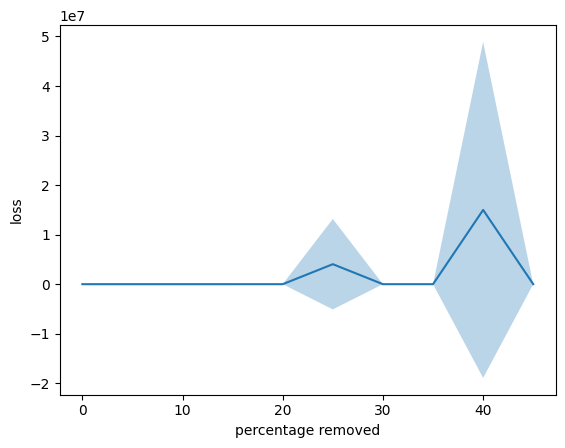

In [153]:
plot_dict(dict)